In [31]:
# EDA data
import pandas as pd
import numpy as np

# Visualization data
import matplotlib.pyplot as plt

# Import Models
from sklearn.cluster import KMeans

# Evalotion
from sklearn.metrics import silhouette_score , calinski_harabasz_score , davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')


In [32]:
url = "https://raw.githubusercontent.com/shaadclt/Customer-Segmentation-KMeansClustering/refs/heads/main/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
X = df.iloc[:,[3,4]].values
X[:11]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72],
       [19, 14]])

In [35]:
wcss = []
for i in range(1 ,11):
    kmeans = KMeans(n_clusters=i , init='k-means++' , random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

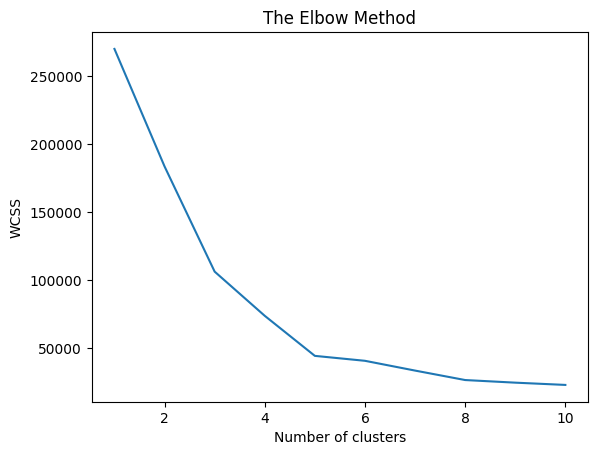

In [36]:
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

In [37]:
kmeans = KMeans(n_clusters=3 , init='k-means++' , random_state=42)
labels = kmeans.fit_predict(X)

In [38]:
sil_score = silhouette_score(X , labels)
cal_score = calinski_harabasz_score(X , labels)
dav_score = davies_bouldin_score(X , labels)

print(f"Silhouette Score : {sil_score}\n")
print(f"Calinski Harabasz Score : {cal_score}\n")
print(f"Davies Bouldin Score : {dav_score}\n")

Silhouette Score : 0.46761358158775435

Calinski Harabasz Score : 151.5570090006799

Davies Bouldin Score : 0.715276820248462



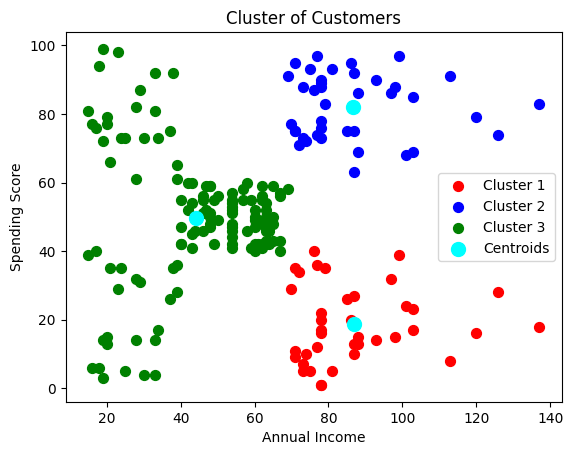

In [39]:
plt.scatter(X[labels == 0 , 0] , X[labels == 0 ,1] , s = 50 , c="red" , label="Cluster 1")
plt.scatter(X[labels == 1 , 0] , X[labels == 1 ,1] , s = 50 , c="blue" , label="Cluster 2")
plt.scatter(X[labels == 2 , 0] , X[labels == 2 ,1] , s = 50 , c="green" , label="Cluster 3")
# plt.scatter(X[labels == 3 , 0] , X[labels == 3 ,1] , s = 50 , c="black" , label="Cluster 4")
# plt.scatter(X[labels == 4 , 0] , X[labels == 4 ,1] , s = 50 , c="yellow" , label="Cluster 5")

plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s = 100 , c="cyan" , label="Centroids")

plt.title('Cluster of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show();

In [40]:
# TheEnd